In [31]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [32]:
# Read CSV and Convert data
matched_ratings = pd.read_csv("src/data/data_matched_beer_data/ratings.csv", header=[0, 1])
matched_ratings.columns = ['_'.join(col).strip() for col in matched_ratings.columns.values]
matched_ratings['ba_date'] = pd.to_datetime(matched_ratings['ba_date'], unit='s')
matched_ratings['rb_date'] = pd.to_datetime(matched_ratings['rb_date'], unit='s')
matched_ratings['ba_user_name'] = matched_ratings['ba_user_name'].str.lower()
matched_ratings['rb_user_name'] = matched_ratings['rb_user_name'].str.lower()

# Handle missing values in text columns
matched_ratings['rb_text'] = matched_ratings['rb_text'].fillna('')
matched_ratings['ba_text'] = matched_ratings['ba_text'].fillna('')

# Define keywords that make sense for newcomers
keywords = [
    "newcomer",
    "brand new beer",
    "just released",
    "just launched",
    "new release",
    "fresh release",
    "new arrival",
    "first batch",
    "first release",
    "limited release",
    "debut beer",
    "new to the market",
    "recently launched",
    "latest offering",
    "new addition"
]

# Use regex pattern for the keywords 
pattern = '|'.join([rf'\b{k}\b' for k in keywords])

# Search for keyword hits in 'rb_text' and 'ba_text', case-insensitive
matched_ratings['rb_keyword_present'] = matched_ratings['rb_text'].str.contains(
    pattern, flags=re.IGNORECASE, regex=True)
matched_ratings['ba_keyword_present'] = matched_ratings['ba_text'].str.contains(
    pattern, flags=re.IGNORECASE, regex=True)

# Filter for reviews with positive hits in either RB or BA
keyword_reviews = matched_ratings[
    matched_ratings['rb_keyword_present'] | matched_ratings['ba_keyword_present']
]

# Get the unique beer_ids
keyword_beers = keyword_reviews['ba_beer_id'].unique()

print("Confirmed newcomer beers based on review text:")
print(keyword_beers)
print()

# Read matched beer csv
beers = pd.read_csv("src/data/data_matched_beer_data/beers.csv")

# Get beer names from the matched beer df
filtered_beers = beers[beers['ba.5'].isin(keyword_beers)]

print("Confirmed newcomer beers names:")
print(filtered_beers["ba.6"])
filtered_beers.to_csv("TextAnalysis_Newcomers.csv", header=True)

Confirmed newcomer beers based on review text:
[  8668  49183  53039 137262 207342 253015  65150  64193 115467  32022
  30174  33960 283794  92907  71620  71073   1855   5411 257931 257429
  62403   3833  69461  49634 251452 187911 183179  55554  36594  81079
 112081  73949  75160  37201  37457  49662  36316  84642  36418 156482]

Confirmed newcomer beers names:
21554    Southampton Peconic County Reserve Ale
22113                                 Tesseract
22786                           Cache La Porter
25164                              Stoudts Pils
29379                                 Tafelbier
29420                           Bobhouse Bitter
29431                              Winter Wheat
29526                     Hometown Double Brown
29632                                Wood Devil
31190        Kentucky Bourbon Barrel Barleywine
32854                                  IPA (II)
32956     Daybreak (Orange Liqueur Barrel Aged)
33835      Newport Storm - Kim (Cyclone Series)
35717      

C:\Users\matti\AppData\Local\Temp\ipykernel_26232\2240916314.py:54: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  beers = pd.read_csv("src/data/data_matched_beer_data/beers.csv")


In [33]:
#Read the csv with the reviewdensity results and filter for only the keyword_beers
Newcomers = pd.read_csv("ReviewDensity_Newcomers_per_year.csv")
filtered_newcomers = Newcomers[Newcomers['ba_beer_id'].isin(keyword_beers)]
print(filtered_newcomers.head(100))
newcomer_beers = filtered_newcomers
newcomer_beers.to_csv("TextAnalysis_Matched_per_year.csv", header=True, index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC, na_rep='NaN')


      Unnamed: 0  ba_beer_id  year  review_count             ba_beer_name
101          920        3833  2002             3  AleSmith Speedway Stout
102          921        3833  2003             3  AleSmith Speedway Stout
103          922        3833  2004             6  AleSmith Speedway Stout
104          923        3833  2005             1  AleSmith Speedway Stout
105          924        3833  2006            10  AleSmith Speedway Stout
...          ...         ...   ...           ...                      ...
2348        1815       36594  2011             4             Wailua Wheat
2349        1816       36594  2013             1             Wailua Wheat
2350        1817       36594  2014             1             Wailua Wheat
2351        1818       36594  2016             1             Wailua Wheat
2352        1819       36594  2017             1             Wailua Wheat

[87 rows x 5 columns]


C:\Users\matti\AppData\Local\Temp\ipykernel_26232\395400822.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


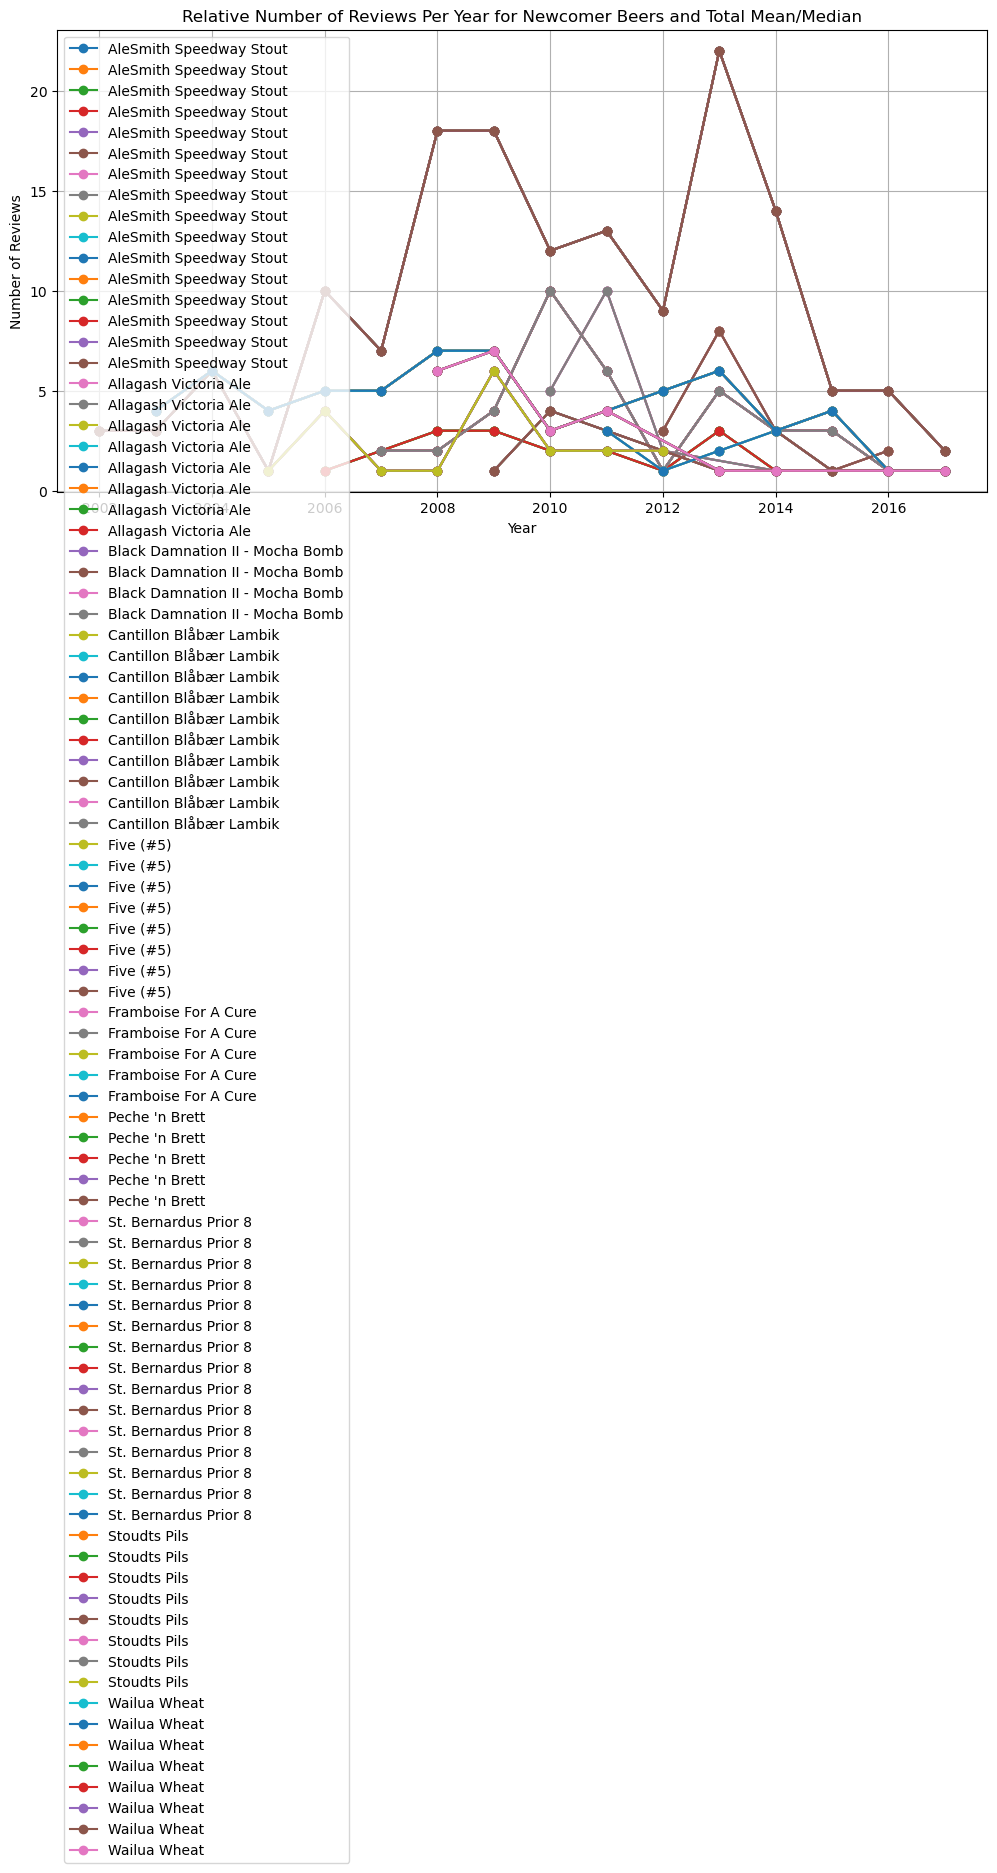

In [35]:
plt.figure(figsize=(12, 6))

# Plot newcomers
legend_entries = []
for beer_id, beer_name in zip(newcomer_beers['ba_beer_id'].head(100), newcomer_beers['ba_beer_name'].head(100)):
    beer_data = newcomer_beers[newcomer_beers['ba_beer_id'] == beer_id].sort_values('year')
    if not beer_data.empty:  # Only plot and add to legend if there's data
        line, = plt.plot(beer_data['year'], beer_data['review_count'], marker='o', label=f"{beer_name}")
        legend_entries.append(line)


plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Relative Number of Reviews Per Year for Newcomer Beers and Total Mean/Median')
plt.legend(handles=legend_entries)
plt.grid(True)
plt.tight_layout()
plt.show()
